In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
Country = ("B","C","D","E","F","G","H")

In [7]:
Q = (80,150,135,165,95,130,110)

In [8]:
L = (60,100,100,120,70,90,80)

In [9]:
K = (50,100,80,100,60,80,70)

In [10]:
data = pd.DataFrame({'Country': ["B","C","D","E","F","G","H"],
                     'Q': [80,150,135,165,95,130,110],
                     'L': [60,100,100,120,70,90,80],
                     'K': [50,100,80,100,60,80,70]})

In [11]:
data

,Country,Q,L,K
0,B,80,60,50
1,C,150,100,100
2,D,135,100,80
3,E,165,120,100
4,F,95,70,60
5,G,130,90,80
6,H,110,80,70


In [12]:
data.describe()

,Q,L,K
count,7.000000,7.000000,7.000000
mean,123.571429,88.571429,77.142857
std,30.237158,20.354010,18.898224
min,80.000000,60.000000,50.000000
25%,102.500000,75.000000,65.000000
50%,130.000000,90.000000,80.000000
75%,142.500000,100.000000,90.000000
max,165.000000,120.000000,100.000000


In [13]:
data.var()

Q    914.285714
L    414.285714
K    357.142857
dtype: float64

Text(0, 0.5, 'Frequency')

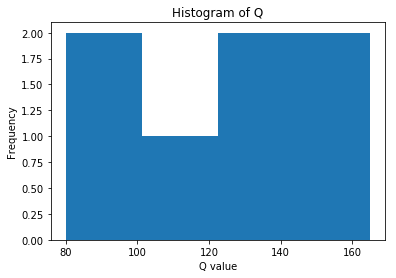

In [14]:
plt.hist(data['Q'], bins = 'auto')
plt.title('Histogram of Q')
plt.xlabel('Q value')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

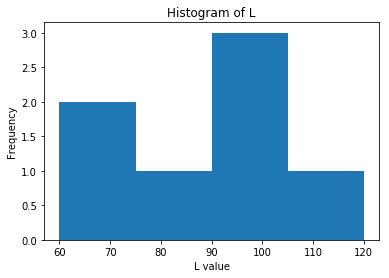

In [17]:
plt.hist(data['L'], bins= 'auto')
plt.title('Histogram of L')
plt.xlabel('L value')
plt.ylabel('Frequency')

In [18]:
print(np.log(data['Q']))

0    4.382027
1    5.010635
2    4.905275
3    5.105945
4    4.553877
5    4.867534
6    4.700480
Name: Q, dtype: float64


In [19]:
print(np.log(data['K']))

0    3.912023
1    4.605170
2    4.382027
3    4.605170
4    4.094345
5    4.382027
6    4.248495
Name: K, dtype: float64


In [20]:
print(np.log(data['L']))

0    4.094345
1    4.605170
2    4.605170
3    4.787492
4    4.248495
5    4.499810
6    4.382027
Name: L, dtype: float64


In [21]:
predictors = data[['L','K']]

In [22]:
response = data[['Q']]

In [23]:
model = LinearRegression().fit(np.log(predictors), np.log(response))

In [24]:
model.intercept_

array([0.14623321])

In [25]:
model.coef_

array([[0.54842747, 0.50874094]])

In [26]:
response_predict = model.predict(np.log(predictors))

In [27]:
residuals = np.log(response) - response_predict

Text(0, 0.5, 'residuals')

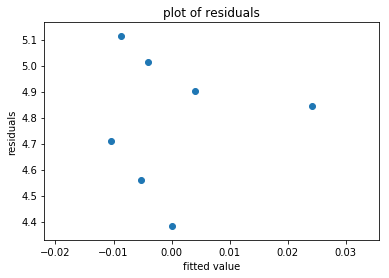

In [28]:
plt.scatter(residuals, response_predict)
plt.title('plot of residuals')
plt.xlabel('fitted value')
plt.ylabel('residuals')

In [29]:
R = model.score(np.log(predictors),np.log(response))

In [30]:
R_sq_adj = 1-((1-R)*(7-1)/(7-2-1))

In [31]:
print(R_sq_adj)

0.9968763418198051


In [32]:
import statsmodels.formula.api as smf

In [33]:
model2 = smf.ols('np.log(Q)~np.log(K) + np.log(L)', data = data).fit()

In [34]:
model2.summary()

/home/luongbinh/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(Q)   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     958.4
Date:                Thu, 16 May 2019   Prob (F-statistic):           4.34e-06
Time:                        18:09:55   Log-Likelihood:                 21.712
No. Observations:                   7   AIC:                            -37.42
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1462      0.114      1.282      0.269      -0.170       0.463
np.log(K)      0.5087      0.083      6.150      0.004       0.279       0.738
np.log(L)      0.5484      0.090      6.127      0.004       0.300       0.797
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.801
Prob(Omnibus):                    nan   Jarque-Bera (JB):                2.261
Skew:                           1.352   Prob(JB):                        0.323
Kurtosis:                       3.665   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""